In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from statistics import mean
import re
from itertools import permutations, dropwhile
#This is used to get zip_longest in python 2. I have to use this for the next few days as I am on my work computer and
#python 2 is the only version that I am allowed to have installed on this machine. I have my new personal laptop on the way.
from itertools import izip_longest
import math

In [32]:
#Exercise 1

#Create a list
list1 = [1, 2, 3, 4, 5]
#Iterate over the list
emptyList = [number for number in list1]
#Sort the results
emptyList.sort(reverse = True)
#Generate random numbers
listOfRandNums = random.sample(range(0,1000), 5)
#Add to list
for num in listOfRandNums:
    emptyList.append(num)
#Print the results
print(emptyList)
#or
print([num for num in emptyList])

[5, 4, 3, 2, 1, 547, 598, 762, 49, 999]
[5, 4, 3, 2, 1, 547, 598, 762, 49, 999]


In [33]:
#Exercise 2

#Bring in the data set
data = pd.read_excel("world-population.xlsm")
print(data)

    Year  Population
0   1960  3028654024
1   1961  3068356747
2   1962  3121963107
3   1963  3187471383
4   1964  3253112403
5   1965  3320396924
6   1966  3390712300
7   1967  3460521851
8   1968  3531547287
9   1969  3606994959
10  1970  3682870688
11  1971  3761750672
12  1972  3839147707
13  1973  3915742695
14  1974  3992806090
15  1975  4068032705
16  1976  4141383058
17  1977  4214499013
18  1978  4288485981
19  1979  4363754326
20  1980  4439638086
21  1981  4516734312
22  1982  4595890494
23  1983  4675178812
24  1984  4753877875
25  1985  4834206631
26  1986  4918126890
27  1987  5004006066
28  1988  5090899475
29  1989  5178059174
30  1990  5266783430
31  1991  5351836347
32  1992  5433823608
33  1993  5516863641
34  1994  5598658151
35  1995  5681689325
36  1996  5762235749
37  1997  5842585301
38  1998  5921799957
39  1999  6001269553
40  2000  6078274622
41  2001  6155652495
42  2002  6232413711
43  2003  6309266583
44  2004  6385778679
45  2005  6462054420
46  2006  653

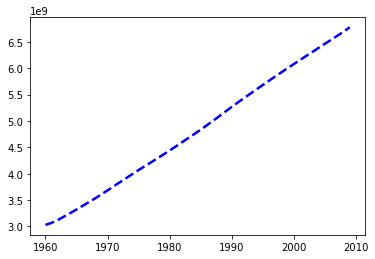

In [34]:
#Create a line chart of the data
%matplotlib inline
plt.plot(data["Year"], data["Population"],
        color = 'blue',
        linewidth = 2.5,
        linestyle = "--")

In [103]:
#Exercise 3

#Activity 1: Handling lists
#Generate list of 100 random numbers
listOfRandomNums = random.sample(range(0,5000), 100)

#Create a list of numbers divisible by three from the randomly generated list of numbers
numsDivBy3 = [num for num in listOfRandomNums if num%3==0]

#Calculate the length of both lists
randListLeng = len(listOfRandomNums)
numsDivBy3Leng = len(numsDivBy3)

#Using a loop, perform steps 2 and 3 and find the difference variable three times
diffValues = []
for iteration in range(0, 3):
    listOfRandomNumsInLoop = random.sample(range(0,5000), 100)
    numsDivBy3InLoop = [num for num in listOfRandomNumsInLoop if num%3==0]
    randListLengInLoop = len(listOfRandomNumsInLoop)
    numsDivBy3LengInLoop = len(numsDivBy3InLoop)
    print("The difference variable # {} is: {}").format(iteration +1, randListLengInLoop - numsDivBy3LengInLoop)
    diffValues.append(randListLengInLoop - numsDivBy3LengInLoop)

#Find arithmetic mean of the difference values
print("The mean of the difference variables of the three lists is: {}").format(mean(diffValues))

The difference variable # 1 is: 64
The difference variable # 2 is: 72
The difference variable # 3 is: 74
The mean of the difference variables of the three lists is: 70.0


In [36]:
#Activity 2: Analyze a multiline string and generate the unique word count

#Create a multiline text variable
pAndP = """It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.

However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered the rightful property of some one or other of their daughters.

"My dear Mr. Bennet," said his lady to him one day, "have you heard that Netherfield Park is let at last?"

Mr. Bennet replied that he had not.

"But it is," returned she; "for Mrs. Long has just been here, and she told me all about it."

Mr. Bennet made no answer.

"Do you not want to know who has taken it?" cried his wife impatiently.

"You want to tell me, and I have no objection to hearing it."

This was invitation enough.

"Why, my dear, you must know, Mrs. Long says that Netherfield is taken by a young man of large fortune from the north of England; that he came down on Monday in a chaise and four to see the place, and was so much delighted with it, that he agreed with Mr. Morris immediately; that he is to take possession before Michaelmas, and some of his servants are to be in the house by the end of next week."

"What is his name?"

"Bingley."

"Is he married or single?"

"Oh! Single, my dear, to be sure! A single man of large fortune; four or five thousand a year. What a fine thing for our girls!"

"How so? How can it affect them?"

"My dear Mr. Bennet," replied his wife, "how can you be so tiresome! You must know that I am thinking of his marrying one of them."

"Is that his design in settling here?"

"Design! Nonsense, how can you talk so! But it is very likely that he may fall in love with one of them, and therefore you must visit him as soon as he comes."

"I see no occasion for that. You and the girls may go, or you may send them by themselves, which perhaps will be still better, for as you are as handsome as any of them, Mr. Bingley may like you the best of the party."

"My dear, you flatter me. I certainly have had my share of beauty, but I do not pretend to be anything extraordinary now. When a woman has five grown-up daughters, she ought to give over thinking of her own beauty."

"In such cases, a woman has not often much beauty to think of."

"But, my dear, you must indeed go and see Mr. Bingley when he comes into the neighbourhood."

"It is more than I engage for, I assure you."

"But consider your daughters. Only think what an establishment it would be for one of them. Sir William and Lady Lucas are determined to go, merely on that account, for in general, you know, they visit no newcomers. Indeed you must go, for it will be impossible for us to visit him if you do not."

"You are over-scrupulous, surely. I dare say Mr. Bingley will be very glad to see you; and I will send a few lines by you to assure him of my hearty consent to his marrying whichever he chooses of the girls; though I must throw in a good word for my little Lizzy."

"I desire you will do no such thing. Lizzy is not a bit better than the others; and I am sure she is not half so handsome as Jane, nor half so good-humoured as Lydia. But you are always giving her the preference."

"They have none of them much to recommend them," replied he; "they are all silly and ignorant like other girls; but Lizzy has something more of quickness than her sisters."

"Mr. Bennet, how can you abuse your own children in such a way? You take delight in vexing me. You have no compassion for my poor nerves."

"You mistake me, my dear. I have a high respect for your nerves. They are my old friends. I have heard you mention them with consideration these last twenty years at least."

"Ah, you do not know what I suffer."

"But I hope you will get over it, and live to see many young men of four thousand a year come into the neighbourhood."

"It will be no use to us, if twenty such should come, since you will not visit them."

"Depend upon it, my dear, that when there are twenty, I will visit them all."

Mr. Bennet was so odd a mixture of quick parts, sarcastic humour, reserve, and caprice, that the experience of three-and-twenty years had been insufficient to make his wife understand his character. Her mind was less difficult to develop. She was a woman of mean understanding, little information, and uncertain temper. When she was discontented, she fancied herself nervous. The business of her life was to get her daughters married; its solace was visiting and news. 
"""


In [74]:
#Find the type type and length of the multiline string
print(type(pAndP))
print(len(pAndP))

#Remove all new lines and symbols with the replace function
pAndP = re.sub('[^0-9a-zA-Z]+', ' ', pAndP)

#Find all of the words using the split function
listOfWords = pAndP.split(" ")

#Find all unique words in the list
uniqueWords = []
for word in listOfWords:
    if word not in uniqueWords:
        uniqueWords.append(word)
        
#Get a word count for the number of times a word is said in the text
uniqueWordDict = {}
for word in uniqueWords:
    count = 0
    for notUniqueWord in listOfWords:
        if word == notUniqueWord:
            count += 1
    uniqueWordDict[word] = count

#Find the top 25 words using the slice function
sortedDictAsList = sorted(uniqueWordDict.items(), key=lambda x: x[1], reverse=True)
top25 = {}
count = 0 
while(count < 25):
    top25[sortedDictAsList[count][0]]= sortedDictAsList[count][1]
    count += 1

<type 'str'>
4240


In [92]:
#Activity 3: Permutation, iterator, lambda, list

#Write and expression to generate all possible three digit numbers using 0, 1, and 2.
nums = [0, 1, 2]
listOfPossOpts = permutations(nums)

#Loop over the iterator expression and print each element, verify that the returned values are tuples
for val in list(listOfPossOpts):
    assert True == isinstance(val, tuple), "Not a tuple"
    print(val)

(0, 1, 2)
(0, 2, 1)
(1, 0, 2)
(1, 2, 0)
(2, 0, 1)
(2, 1, 0)


In [95]:
#Write the loop again using dropwhile with a lambda expression to drop any leading zeros from the tuples
for tuple in permutations(nums):
    print(list(dropwhile(lambda x : x == 0, tuple)))
    

[1, 2]
[2, 1]
[1, 0, 2]
[1, 2, 0]
[2, 0, 1]
[2, 1, 0]


In [97]:
#Write the logic from before, but this time write a separate function where you will be
#passing down the list generated from dropwhile and return the elements as single whole number
def convert_to_number(number_stack):
    final_number = 0
    for i in range(0, len(number_stack)):
        final_number += (number_stack.pop() * (math.pow(10, i)))
    return final_number

for number_tuple in permutations(range(3)):
    number_stack = list(dropwhile(lambda x : x == 0, number_tuple))
    print(convert_to_number(number_stack))
 

12.0
21.0
102.0
120.0
201.0
210.0


In [117]:
#Activity 4: Design your own CSV Parser

#Create a function to zip header, line, and fillvalue=None
def return_dict_from_csv_line(header, line):
    zipped_line = izip_longest(header, line, fillvalue = None)
    ret_dict = {kv[0]: kv[1] for kv in zipped_line}
    return ret_dict

#Open the sales_record.csv file (open is apparently different in python 2. I am of course only using this 
#because it is all that I have available on my work PC, I will fix this for next week)
sales = open("sales_record.csv", "r")

#Read each line and create a new dictionary for each row in the CSV with the headers as keys.
firstLine = sales.readline()
header = firstLine.replace("\n", " ").split(",")
for i, line in enumerate(sales):
    line = line.replace("\n", " ").split(",")
    d = return_dict_from_csv_line(header, line)
    print(d)
    if( i > 10):
         break

{'Item Type': 'Baby Food', 'Total Revenue': '140914.56', 'Country': 'Antigua and Barbuda ', 'Region': 'Central America and the Caribbean', 'Sales Channel': 'Online', 'Order Date': '12/20/2013', 'Units Sold': '552', 'Unit Cost': '159.42', 'Total Profit ': '52914.72 ', 'Unit Price': '255.28', 'Order Priority': 'M', 'Ship Date': '1/11/2014', 'Total Cost': '87999.84', 'Order ID': '957081544'}
{'Item Type': 'Snacks', 'Total Revenue': '330640.86', 'Country': 'Panama', 'Region': 'Central America and the Caribbean', 'Sales Channel': 'Offline', 'Order Date': '7/5/2010', 'Units Sold': '2167', 'Unit Cost': '97.44', 'Total Profit ': '119488.38 ', 'Unit Price': '152.58', 'Order Priority': 'C', 'Ship Date': '7/26/2010', 'Total Cost': '211152.48', 'Order ID': '301644504'}
{'Item Type': 'Beverages', 'Total Revenue': '226716.10', 'Country': 'Czech Republic', 'Region': 'Europe', 'Sales Channel': 'Offline', 'Order Date': '9/12/2011', 'Units Sold': '4778', 'Unit Cost': '31.79', 'Total Profit ': '74823.48 